#Exploratory Data Analysis (EDA)

## Importing necessary Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Loading the dataset

In [11]:
df = pd.read_csv("/content/drive/MyDrive/10Acadamy/MachineLearningRating_v3.txt",sep='|', low_memory=False)


In [12]:
print(df.head())

   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

###Handle Date Columns

In [13]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

##🧹 Missing Values

In [17]:
df.isnull().sum().sort_values(ascending=False)

,0
NumberOfVehiclesInFleet,1000098
CrossBorder,999400
CustomValueEstimate,779642
Rebuilt,641901
Converted,641901
WrittenOff,641901
NewVehicle,153295
Bank,145961
AccountType,40232
Gender,9536


###Check dtypes

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    990562 non-null   object

###Summary stats for numerical columns

In [16]:
print(df.describe())

       UnderwrittenCoverID      PolicyID               TransactionMonth  \
count         1.000098e+06  1.000098e+06                        1000098   
mean          1.048175e+05  7.956682e+03  2015-02-28 10:49:29.147423744   
min           1.000000e+00  1.400000e+01            2013-10-01 00:00:00   
25%           5.514300e+04  4.500000e+03            2015-01-01 00:00:00   
50%           9.408300e+04  7.071000e+03            2015-04-01 00:00:00   
75%           1.391900e+05  1.107700e+04            2015-06-01 00:00:00   
max           3.011750e+05  2.324600e+04            2015-08-01 00:00:00   
std           6.329371e+04  5.290039e+03                            NaN   

         PostalCode        mmcode  RegistrationYear      Cylinders  \
count  1.000098e+06  9.995460e+05      1.000098e+06  999546.000000   
mean   3.020601e+03  5.487770e+07      2.010225e+03       4.046642   
min    1.000000e+00  4.041200e+06      1.987000e+03       0.000000   
25%    8.270000e+02  6.005692e+07      2.008

##📊 Univariate Analysis

In [25]:
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

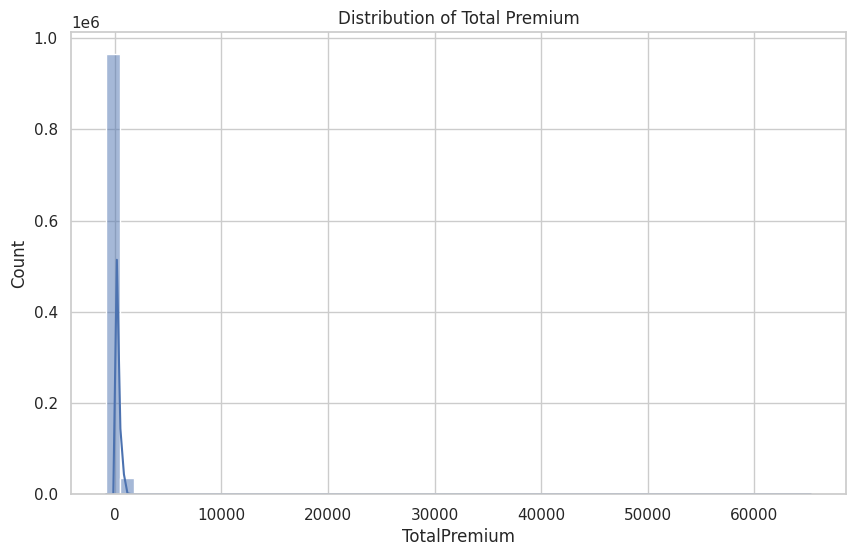

In [26]:
sns.histplot(df['TotalPremium'],bins=50, kde=True)
plt.title('Distribution of Total Premium')
plt.show()

##📈 Bivariate Analysis or Loss Ratio Analysis

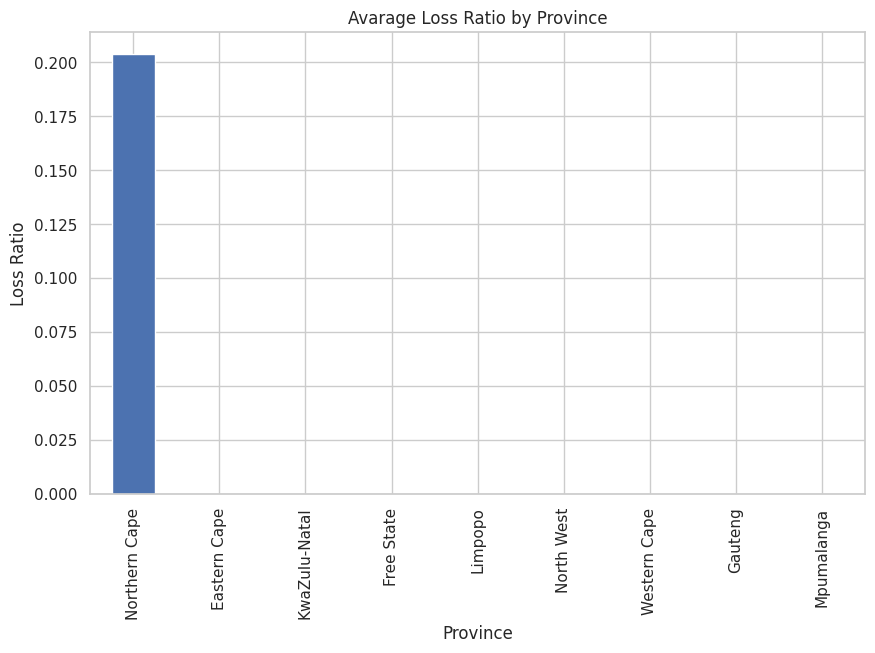

In [27]:
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
df.groupby('Province')['LossRatio'].mean().sort_values().plot(kind='bar')
plt.title("Avarage Loss Ratio by Province")
plt.ylabel("Loss Ratio")
plt.show()

## 🚨 Outlier Detection

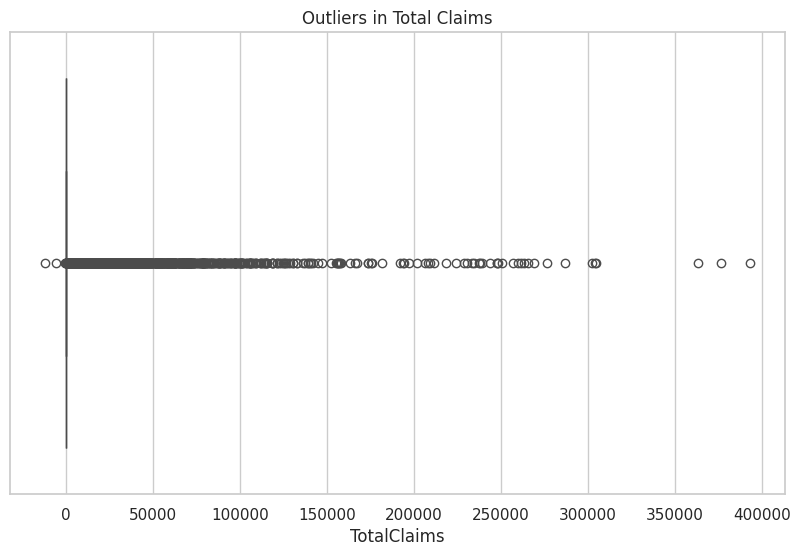

In [28]:
sns.boxplot(x=df['TotalClaims'])
plt.title('Outliers in Total Claims')
plt.show()

## 🎨 Insight Plot

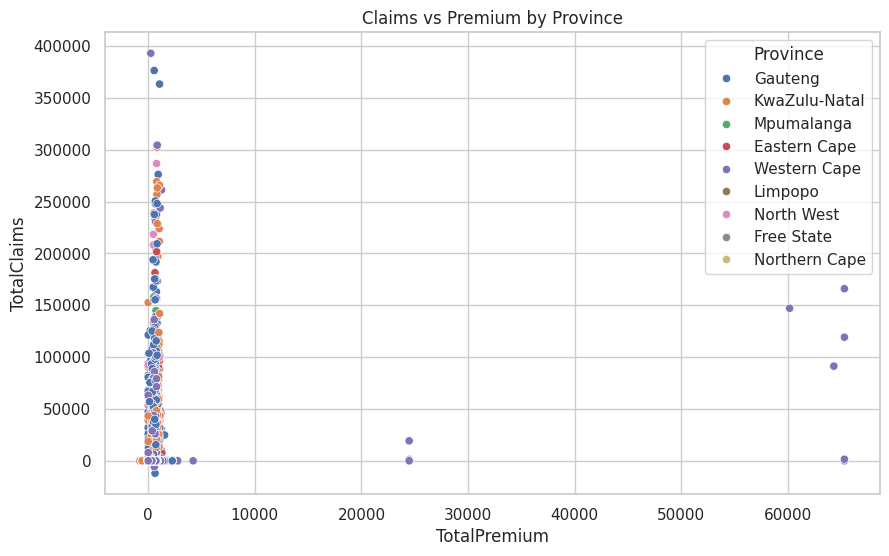

In [30]:
sns.scatterplot(data=df ,x='TotalPremium', y='TotalClaims', hue='Province')
plt.title('Claims vs Premium by Province')
plt.show()